In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
Sales = pd.read_csv(r'C:\Users\E166017\OneDrive - Mohawk Industries\Documents\Python Scripts\Supermarket Sales Analysis with Data Science Kaggle.csv')
# import Supermarket Sales Analysis with Data Science from Kaggle

In [5]:
print(Sales)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [6]:
print (Sales.head(10))

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   
5  699-14-3026      C  Naypyitaw        Normal    Male   
6  355-53-5943      A     Yangon        Member  Female   
7  315-22-5665      C  Naypyitaw        Normal  Female   
8  665-32-9167      A     Yangon        Member  Female   
9  692-92-5582      B   Mandalay        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22

In [7]:
Sales_grouped_Min = Sales.groupby(['Gender']).min()
# group the column "gender" under Minimum values

In [8]:
print (Sales_grouped_Min)

         Invoice ID Branch      City Customer type            Product line  \
Gender                                                                       
Female  101-81-4070      A  Mandalay        Member  Electronic accessories   
Male    101-17-6199      A  Mandalay        Member  Electronic accessories   

        Unit price  Quantity  Tax 5%    Total      Date   Time Payment   cogs  \
Gender                                                                          
Female       10.16         1  0.6045  12.6945  1/1/2019  10:00    Cash  12.09   
Male         10.08         1  0.5085  10.6785  1/1/2019  10:00    Cash  10.17   

        gross margin percentage  gross income  Rating  
Gender                                                 
Female                 4.761905        0.6045     4.0  
Male                   4.761905        0.5085     4.0  


In [9]:
Sales_grouped_Min.to_csv(r'C:\Users\E166017\OneDrive - Mohawk Industries\Documents\Python Scripts\Output.csv')
# export the result variable "Sales_grouped_Min" as a csv file.

In [10]:
Sales_grouped_Max = Sales.groupby(['Product line']).max()
# group the column "Product line" under Minimum values

In [11]:
print (Sales_grouped_Max)

                         Invoice ID Branch    City Customer type Gender  \
Product line                                                              
Electronic accessories  891-01-7034      C  Yangon        Normal   Male   
Fashion accessories     898-04-2717      C  Yangon        Normal   Male   
Food and beverages      895-66-0685      C  Yangon        Normal   Male   
Health and beauty       885-17-6250      C  Yangon        Normal   Male   
Home and lifestyle      892-05-6689      C  Yangon        Normal   Male   
Sports and travel       891-58-8335      C  Yangon        Normal   Male   

                        Unit price  Quantity   Tax 5%      Total      Date  \
Product line                                                                 
Electronic accessories       99.73        10  44.8785   942.4485  3/9/2019   
Fashion accessories          99.89        10  49.6500  1042.6500  3/9/2019   
Food and beverages           99.79        10  49.2600  1034.4600  3/9/2019   
Health an

In [12]:
Sales_grouped_Min.to_csv(r'C:\Users\E166017\OneDrive - Mohawk Industries\Documents\Python Scripts\Sales_group_min.csv')
# export to a csv file

In [13]:
Rebate = {'Product line' : ['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel'],
                         'Rebate' :[0.05, 0.10, 0.10, 0.20, 0.22, 0.18]}
# Set up a dictionary on rebate categories and rates.

In [14]:
df_rebate = pd.DataFrame(Rebate)

In [15]:
print (df_rebate)

             Product line  Rebate
0  Electronic accessories    0.05
1     Fashion accessories    0.10
2      Food and beverages    0.10
3       Health and beauty    0.20
4      Home and lifestyle    0.22
5       Sports and travel    0.18


In [16]:
inner = pd.merge(Sales, df_rebate, on='Product line')
# now that the dictionary is a recognised dataframe I can merge it with the Sales dataframe using the key "Product line".

In [17]:
print (inner.head())
# now the new data has the rebate rates on each row based on matching key "Product line".

    Invoice ID Branch    City Customer type  Gender       Product line  \
0  750-67-8428      A  Yangon        Member  Female  Health and beauty   
1  123-19-1176      A  Yangon        Member    Male  Health and beauty   
2  665-32-9167      A  Yangon        Member  Female  Health and beauty   
3  829-34-3910      A  Yangon        Normal  Female  Health and beauty   
4  656-95-9349      A  Yangon        Member  Female  Health and beauty   

   Unit price  Quantity   Tax 5%     Total       Date   Time      Payment  \
0       74.69         7  26.1415  548.9715   1/5/2019  13:08      Ewallet   
1       58.22         8  23.2880  489.0480  1/27/2019  20:33      Ewallet   
2       36.26         2   3.6260   76.1460  1/10/2019  17:15  Credit card   
3       71.38        10  35.6900  749.4900  3/29/2019  19:21         Cash   
4       68.93         7  24.1255  506.6355  3/11/2019  11:03  Credit card   

     cogs  gross margin percentage  gross income  Rating  Rebate  
0  522.83                

In [18]:
inner.to_csv(r'C:\Users\E166017\OneDrive - Mohawk Industries\Documents\Python Scripts\Rebate_merge.csv')

In [19]:
for ind, row in inner.iterrows():
    inner.loc[ind, "Rebate value"] = row['Total'] * row['Rebate']
    # add a new calculated column called "Rebate value" from columns Sales * Rebate using loop function

In [20]:
inner.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Rebate,Rebate value
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,0.2,109.7943
1,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0.2,97.8096
2,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,0.2,15.2292
3,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7,0.2,149.8980
4,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6,0.2,101.3271
5,371-85-5789,B,Mandalay,Normal,Male,Health and beauty,87.98,3,13.1970,277.1370,3/5/2019,10:40,Ewallet,263.94,4.761905,13.1970,5.1,0.2,55.4274
6,848-62-7243,A,Yangon,Normal,Male,Health and beauty,24.89,9,11.2005,235.2105,3/15/2019,15:36,Cash,224.01,4.761905,11.2005,7.4,0.2,47.0421
7,595-11-5460,A,Yangon,Normal,Male,Health and beauty,96.58,2,9.6580,202.8180,3/15/2019,10:12,Credit card,193.16,4.761905,9.6580,5.1,0.2,40.5636
8,333-73-7901,C,Naypyitaw,Normal,Female,Health and beauty,54.92,8,21.9680,461.3280,3/23/2019,13:24,Ewallet,439.36,4.761905,21.9680,7.6,0.2,92.2656
9,617-15-4209,C,Naypyitaw,Member,Male,Health and beauty,15.37,2,1.5370,32.2770,3/16/2019,19:47,Cash,30.74,4.761905,1.5370,7.2,0.2,6.4554


In [21]:
inner.to_csv(r'C:\Users\E166017\OneDrive - Mohawk Industries\Documents\Python Scripts\Rebate_value.csv')

In [22]:
for ind, row in inner.iterrows():
    inner.loc[ind, "Net sales"] = row['Total'] - row['Rebate value'] 
    # subtracting rebate value from total sales column and creating net sales column

In [23]:
for ind, row in inner.iterrows():
    inner.loc[ind, "Top Hat"] = row['Net sales'] * 0.02
    # applying additional rebate on net sales columns

In [24]:
inner.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Rebate,Rebate value,Net sales,Top Hat
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,0.2,109.7943,439.1772,8.783544
1,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0.2,97.8096,391.2384,7.824768
2,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,...,17:15,Credit card,72.52,4.761905,3.6260,7.2,0.2,15.2292,60.9168,1.218336
3,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,...,19:21,Cash,713.80,4.761905,35.6900,5.7,0.2,149.8980,599.5920,11.991840
4,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,...,11:03,Credit card,482.51,4.761905,24.1255,4.6,0.2,101.3271,405.3084,8.106168
5,371-85-5789,B,Mandalay,Normal,Male,Health and beauty,87.98,3,13.1970,277.1370,...,10:40,Ewallet,263.94,4.761905,13.1970,5.1,0.2,55.4274,221.7096,4.434192
6,848-62-7243,A,Yangon,Normal,Male,Health and beauty,24.89,9,11.2005,235.2105,...,15:36,Cash,224.01,4.761905,11.2005,7.4,0.2,47.0421,188.1684,3.763368
7,595-11-5460,A,Yangon,Normal,Male,Health and beauty,96.58,2,9.6580,202.8180,...,10:12,Credit card,193.16,4.761905,9.6580,5.1,0.2,40.5636,162.2544,3.245088
8,333-73-7901,C,Naypyitaw,Normal,Female,Health and beauty,54.92,8,21.9680,461.3280,...,13:24,Ewallet,439.36,4.761905,21.9680,7.6,0.2,92.2656,369.0624,7.381248
9,617-15-4209,C,Naypyitaw,Member,Male,Health and beauty,15.37,2,1.5370,32.2770,...,19:47,Cash,30.74,4.761905,1.5370,7.2,0.2,6.4554,25.8216,0.516432


In [25]:
inner.to_csv(r'C:\Users\E166017\OneDrive - Mohawk Industries\Documents\Python Scripts\Rebate_value_TH.csv')

In [26]:
print(inner.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating       Rebate  \
count             1.000000e+03   1000.000000  1000.00000  1000.000000   
mean              4.761905e+00     15.379369     6.97270     0.139180   
std               6.131498e-14     11.708825     1.71858     0.061483   
min               4.761905e+00      0.508500     4

<AxesSubplot:xlabel='Gender', ylabel='Quantity'>

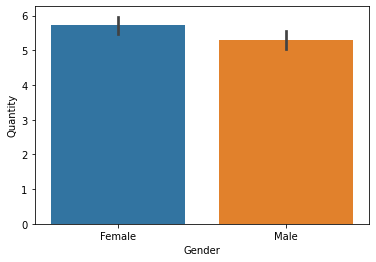

In [30]:
sns.barplot(x=inner['Gender'], y=inner['Quantity'])

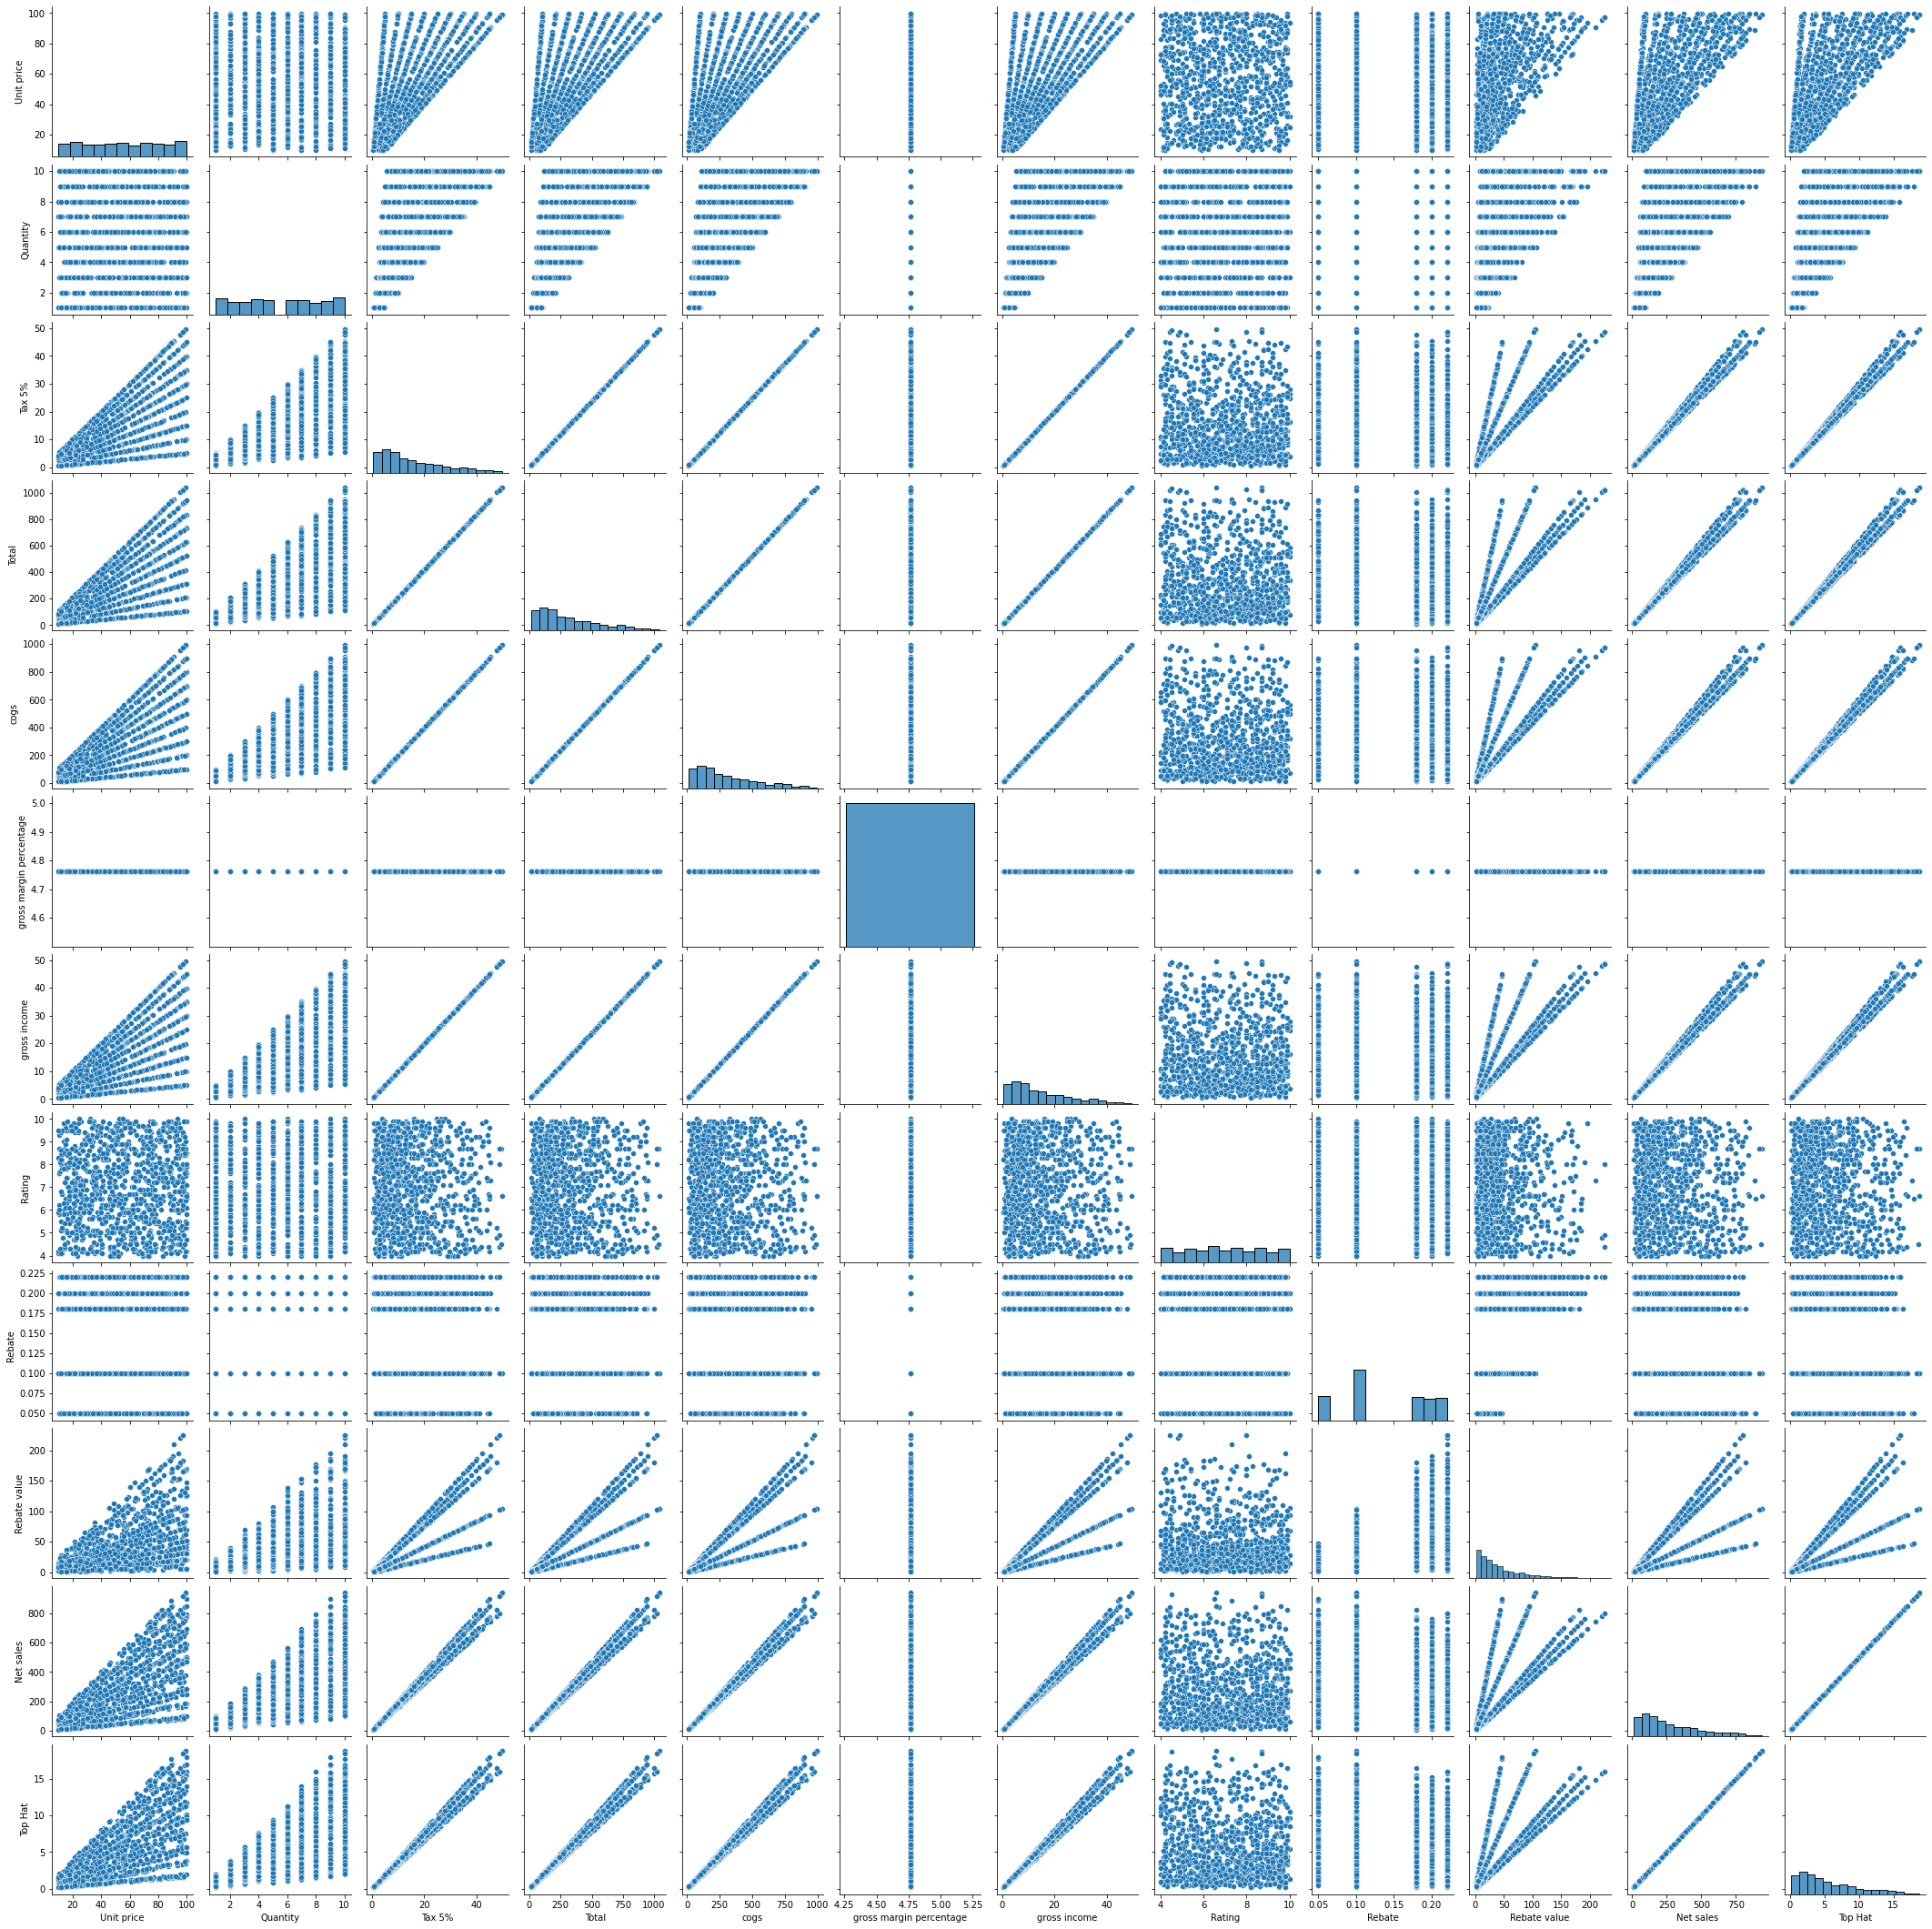

In [33]:
sns.pairplot(inner)

<AxesSubplot:xlabel='Product line', ylabel='Quantity'>

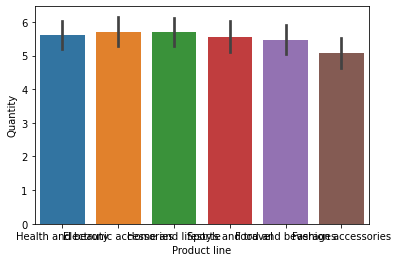

In [36]:
sns.barplot(x=inner['Product line'], y=inner['Quantity'])

<AxesSubplot:xlabel='Payment', ylabel='count'>

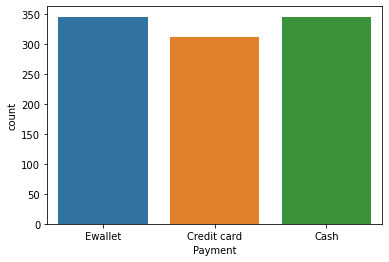

In [40]:
sns.countplot(data=inner['Product line'], x=inner['Payment'])
